In [89]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [90]:
# Download a dataset
!wget "https://drive.google.com/uc?export=download&id=1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v" -O Online_Retail.csv

--2025-09-24 13:41:49--  https://drive.google.com/uc?export=download&id=1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v
Resolving drive.google.com (drive.google.com)... 2404:6800:4007:833::200e, 142.251.222.174
Connecting to drive.google.com (drive.google.com)|2404:6800:4007:833::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v&export=download [following]
--2025-09-24 13:41:49--  https://drive.usercontent.google.com/download?id=1M5IPR96R9efi5cb2n8LxpXIXyx_F0x3v&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2404:6800:4007:834::2001, 142.250.183.161
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2404:6800:4007:834::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45005763 (43M) [application/octet-stream]
Saving to: ‘Online_Retail.csv’

Online_Retail.csv   100%[===================>]  

In [91]:
# Reading a dataset 
df = pd.read_csv("Online_Retail.csv")

In [92]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/10 8:26,3.39,17850.0,United Kingdom


In [93]:
df.shape 

(541909, 8)

So may records present -> 541909
from above datset we can observe same InvoiceNo. have multiple Transaction and having a same CustomerId

In [94]:
df.isna().sum() # so many customerId are nan

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [95]:
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


here quantity is in -ve -> seems user have rteturned the product 
we just need +ve vale - to check what frequent items people are buying

In [96]:
# Filter on quantity where quantity is >= 0
df = df[df.Quantity >= 0 ]
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


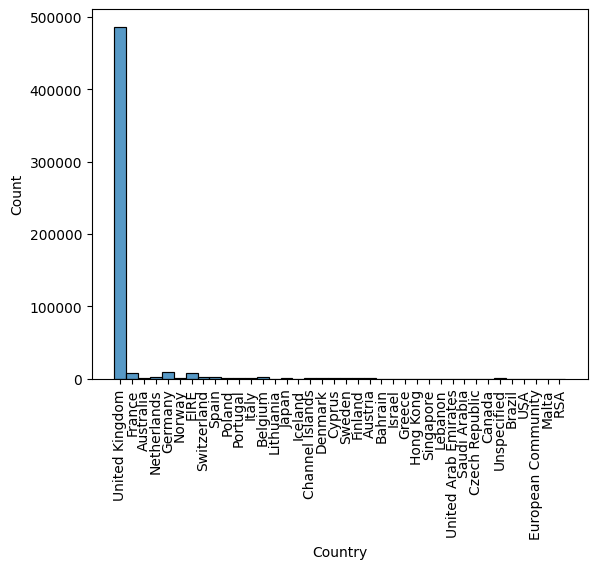

In [97]:
#. Plotting a graph for Country
sns.histplot(df.Country)
plt.xticks(rotation=90)
plt.show()

In [98]:
df["Country"].value_counts(normalize=True) * 100

Country
United Kingdom          91.530158
Germany                  1.701911
France                   1.582578
EIRE                     1.485832
Spain                    0.467734
Netherlands              0.444771
Belgium                  0.382281
Switzerland              0.370234
Portugal                 0.282523
Australia                0.223044
Norway                   0.201775
Italy                    0.142673
Channel Islands          0.140791
Finland                  0.128933
Cyprus                   0.115569
Sweden                   0.084889
Unspecified              0.083947
Austria                  0.074913
Denmark                  0.071525
Poland                   0.062114
Japan                    0.060420
Israel                   0.055526
Hong Kong                0.053455
Singapore                0.041785
Iceland                  0.034257
USA                      0.033692
Canada                   0.028422
Greece                   0.027292
Malta                    0.021081
United

91% of data belong to UK other 9% of data belong to other different countries
we can just consider Uk data for further analysis

In [99]:
df = df[df.Country=="United Kingdom"]
df.shape

(486286, 8)

In [100]:
# total Transaction
df["InvoiceNo"].nunique() # total 18786 unique transactions  present

18786

In [101]:
# total StockCode
df["StockCode"].nunique() # total 3936 unique stocks present

3936

In [102]:
# Pivot the table 
df1 = df.groupby([ "InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo")
df1

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,...,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,add stock to allocate online orders,adjustment,alan hodge cant mamage this section,allocate stock for dotcom orders ta,amazon,amazon adjust,amazon sales,came coded as 20713,check,check?,damaged,did a credit and did not tick ret,dotcom,dotcom adjust,dotcomstock,for online retail orders,found,found box,had been put aside,incorrectly credited C550456 see 47,mailout,mailout,michel oops,on cargo order,rcvd be air temp fix for dotcom sit,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581585

In [103]:
(df1 > 1).any().any()

np.True_

In [104]:
# Change a quantity to 1 or 0 
# -> >=1 - bought a product
# - >=0 - not bought a product, because we dont need actual value,  we just need product is present in Invoice or not
def encode_quantity(x):
    if x >=1:
        return 1
    elif x<=0:
        return 0
df1 = df1.applymap(encode_quantity)
df1.head()

/var/folders/ty/d45wrdc15jb33qmkk51xj29r0000gn/T/ipykernel_1820/2013105463.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(encode_quantity)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,...,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,add stock to allocate online orders,adjustment,alan hodge cant mamage this section,allocate stock for dotcom orders ta,amazon,amazon adjust,amazon sales,came coded as 20713,check,check?,damaged,did a credit and did not tick ret,dotcom,dotcom adjust,dotcomstock,for online retail orders,found,found box,had been put aside,incorrectly credited C550456 see 47,mailout,mailout,michel oops,on cargo order,rcvd be air temp fix for dotcom sit,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
df1.shape

(18194, 4058)

# Apriori Algo

In [106]:
data = apriori(df1, min_support=0.02, use_colnames=True).sort_values("support", ascending=False)
data

,support,itemsets
277,0.119050,(WHITE HANGING HEART T-LIGHT HOLDER)
106,0.106519,(JUMBO BAG RED RETROSPOT)
201,0.092613,(REGENCY CAKESTAND 3 TIER)
162,0.087611,(PARTY BUNTING)
132,0.076509,(LUNCH BAG RED RETROSPOT)
...,...,...
339,0.020062,"(JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."
374,0.020007,"(REGENCY CAKESTAND 3 TIER, PARTY BUNTING)"
324,0.020007,"(JUMBO BAG PINK POLKADOT, JUMBO BAG PINK VINTA..."
365,0.020007,"(LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT)"


In [107]:
data["length"] = data["itemsets"].apply(lambda x : len(x))

In [108]:
data

,support,itemsets,length
277,0.119050,(WHITE HANGING HEART T-LIGHT HOLDER),1
106,0.106519,(JUMBO BAG RED RETROSPOT),1
201,0.092613,(REGENCY CAKESTAND 3 TIER),1
162,0.087611,(PARTY BUNTING),1
132,0.076509,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
339,0.020062,"(JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
374,0.020007,"(REGENCY CAKESTAND 3 TIER, PARTY BUNTING)",2
324,0.020007,"(JUMBO BAG PINK POLKADOT, JUMBO BAG PINK VINTA...",2
365,0.020007,"(LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT)",2


taking a support threshold for 2 % in above case 
WHITE HANGING HEART T-LIGHT HOLDER this product - user bought a lot 
(LUNCH BAG WOODLAND, LUNCH BAG PINK POLKADOT)-> this prodcut in pair user bought a lot 

In [111]:
data[data.length==2]

,support,itemsets,length
325,0.043146,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",2
311,0.038529,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",2
338,0.038364,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)",2
336,0.036111,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...",2
351,0.033363,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
...,...,...,...
347,0.020062,"(JUMBO STORAGE BAG SUKI, JUMBO STORAGE BAG SKU...",2
339,0.020062,"(JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",2
374,0.020007,"(REGENCY CAKESTAND 3 TIER, PARTY BUNTING)",2
324,0.020007,"(JUMBO BAG PINK POLKADOT, JUMBO BAG PINK VINTA...",2


So many products such that - (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS) bought together

# Applying a association rule

In [109]:
rule = association_rules(data, metric='lift', min_threshold=1).sort_values("lift", ascending=False)

In [110]:
rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
188,(WOODEN HEART CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.027976,0.026327,0.020226,0.722986,27.461402,1.0,0.019490,3.514889,0.991319,0.593548,0.715496,0.745627
189,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN HEART CHRISTMAS SCANDINAVIAN),0.026327,0.027976,0.020226,0.768267,27.461402,1.0,0.019490,4.194589,0.989640,0.593548,0.761598,0.745627
51,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.038639,0.038529,0.027097,0.701280,18.201273,1.0,0.025608,3.218638,0.983043,0.541164,0.689310,0.702281
50,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.038529,0.038639,0.027097,0.703281,18.201273,1.0,0.025608,3.239971,0.982930,0.541164,0.691355,0.702281
52,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.051336,0.030010,0.027097,0.527837,17.588775,1.0,0.025556,2.054355,0.994183,0.499493,0.513229,0.715384


(WOODEN STAR CHRISTMAS SCANDINAVIAN)	(WOODEN HEART CHRISTMAS SCANDINAVIAN)-> confidence is  76% means people are buying this both product together

its a high chance if people buy (WOODEN STAR CHRISTMAS SCANDINAVIAN) then people will also buy -> (WOODEN HEART CHRISTMAS SCANDINAVIAN)

Lift for (WOODEN HEART CHRISTMAS SCANDINAVIAN)	 and (WOODEN STAR CHRISTMAS SCANDINAVIAN) high that is 27.46 means a positive influence

We can place both Item together or do product bundling at discounted price to increase sales